# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

1. Mencari feature enginering Umur berdasarkan year_birth customer. Berapa total jumlah anak? apakah dia orang tua? apakah dia adult / remaja/ anak?. Lalu melihat pola umur terhadap transaksi.
2. Melihat jumlah total pengeluaran, berapa total campaign, berapa jumlah transaksi
3. Mencari conversion rate (berapa jumlah response dibandingkan total customer yang visit di platform).
4. melakukan EDA (Univariate, Bivariate, Multivariate) untuk melihat perilaku customer yang berbelanja. 
5. melakukan EDA bisa melakukan clustering. bagaimana hubungan umur - conversion rate, income - conversion rate.
6. hint : umur tidak berkorelasi dengan conversion rate
7. Membuat rekomendasi, contoh :  semakin besar income semakin besar conversion rate
8. Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok
Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign

**Dataset Overview**
- ID = Customer's id
- Year_Birth = Customer's year of birth
- Education = Customer’s level of education
- Marital_Status = Customer’s marital status
- Income = Customer’s yearly household income
- Kidhome = Number of small children in customer’s household
- Teenhome = Number of teenagers in customer’s household
- Dt_Customer = Date of customer’s enrolment with the company
- Recency = Number of days since the last purchase
- MntWines = Amount spent on wine products in the last 2 years
- MntFruits = Amount spent on fruits products in the last 2 years
- MntMeatProducts = Amount spent on meat products in the last 2 years
- MntFishProducts = Amount spent on fish products in the last 2 years
- MntSweetProducts = Amount spent on sweet products in the last 2 years
- MntGoldProds = Amount spent on gold products in the last 2 years
- NumDealsPurchases = Number of purchases made with discount
- NumWebPurchases = Number of purchases made through company’s web site
- NumCatalogPurchases = Number of purchases made using catalogue
- NumStorePurchases = Number of purchases made directly in stores
- NumWebVisitsMonth = Number of purchases made through company’s web site
- AcceptedCmp3 = 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 = 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 = 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1 = 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 = 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Complain = 1 if customer complained in the last 2 years
- Z_CostContact = Cost to contact a customer
- Z_Revenue = Revenue after client accepting campaign
- Response =1 if customer accepted the offer in the last campaign, 0 otherwise


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [68]:
df = pd.read_csv('marketing_campaign_data.csv').drop(['Unnamed: 0'], axis=1)
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [69]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Jumlah Data Duplikat

In [71]:
df.duplicated().sum()

0

Jumlah Null

In [72]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [73]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].max())
print(df['Dt_Customer'].min())

2014-12-06 00:00:00
2012-01-08 00:00:00


## Feature Engineering 

**Extract Umur Pelanggan**

In [74]:
df['Age'] = 2023 - df['Year_Birth']

In [75]:
def Age_category(data):
    if data<=45:
        return 'Produktif(<45)'
    elif data<=55:
        return 'Pra Lansia(46-55)'
    elif data<=65:
        return 'Lansia(56-65)'
    else:
        return 'Manula(>65)'
    
cat_age = df['Age'].apply(lambda data: Age_category(data))
df['Age_category'] = cat_age
df[['Year_Birth','Age','Age_category']].sample(7,random_state=33)

,Year_Birth,Age,Age_category
453,1980,43,Produktif(<45)
633,1960,63,Lansia(56-65)
302,1978,45,Produktif(<45)
463,1963,60,Lansia(56-65)
1638,1969,54,Pra Lansia(46-55)
634,1973,50,Pra Lansia(46-55)
1552,1956,67,Manula(>65)


**Extract Population**

(Merupakan jumlah orang / populasi yang tinggal di rumah customer)

Jumlah Anak (Kidhome) + Jumlah (remaja) + 1 customer

In [76]:
df['Population'] = df['Kidhome'] + df['Teenhome'] + 1
df[['Kidhome','Teenhome','Population']].head()

,Kidhome,Teenhome,Population
0,0,0,1
1,1,1,3
2,0,0,1
3,1,0,2
4,1,0,2


**Total Pengeluaran**

In [77]:
df['Total_cost'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']	
df[['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_cost']].head()

,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_cost
0,635000,88000,546000,172000,88000,88000,1617000
1,11000,1000,6000,2000,1000,6000,27000
2,426000,49000,127000,111000,21000,42000,776000
3,11000,4000,20000,10000,3000,5000,53000
4,173000,43000,118000,46000,27000,15000,422000


**Total Accept Campaign**

Merupakan total campaign yang diambil oleh customer selama join di perusahaan

In [78]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_category,Population,Total_cost
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Manula(>65),1,1617000
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Manula(>65),3,27000


In [79]:
from datetime import datetime
total_acc_campaign = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df['Total_acc_campaign'] = total_acc_campaign

**Conversion Rate**
- conversion rate (berapa jumlah response dibandingkan total visit yang customer dilakukan di platform).
- `Rumus = Total Purchases / Jumlah Visit Per Month`
- Terdapat nilai INF dan NaN. Dikarenakan terdapat nilai 0 pada penyebut(NumWebVisitsMonth). Sehingga jika NumWebVisitsMonth = 0, maka conversion rate akan otomatis di replace menjadi 0.

In [80]:
df['Conversion_rate'] =round(df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases'] / df['NumWebVisitsMonth'],2)
df[['Conversion_rate']].describe()

,Conversion_rate
count,2237.00
mean,inf
std,NaN
min,0.00
25%,5.00
50%,11.00
75%,15.75
max,inf


In [81]:
print("Jumlah INF pada Conversion_rate : ",np.isinf(df['Conversion_rate']).sum())
print("Jumlah NaN pada Conversion_rate : ", df['Conversion_rate'].isna().sum())

Jumlah INF pada Conversion_rate :  8
Jumlah NaN pada Conversion_rate :  3


In [82]:
df['Conversion_rate'] = df['Conversion_rate'].fillna(0)
df['Conversion_rate'] = df['Conversion_rate'].replace([np.inf, -np.inf], 0)
df['Conversion_rate'].describe()

count    2240.000000
mean       10.801277
std         6.253869
min         0.000000
25%         4.950000
50%        10.830000
75%        15.620000
max        43.000000
Name: Conversion_rate, dtype: float64

In [83]:
df[['Conversion_rate','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].head()

,Conversion_rate,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,21.57,3,8,10,4,7
1,4.40,2,1,1,2,5
2,13.50,1,8,2,10,4
3,4.67,2,2,0,4,6
4,14.20,5,5,3,6,5


# EDA

**1. Conversion Rate Terhadap Income**
- Tingkat Conversion rate setiap pelanggan biasanya dipengaruhi oleh jumlah income pelanggan tersebut. artinya terdapat korelasi positif, dimana semakin tinggi tingkat pendapatan pelanggan maka semakin tinggi tingkat conversion rate nya.
- Pelanggan dengan tingkat pendapatan yang tinggi cenderung memiliki kemampuan daya beli yang tinggi, sehingga direkomendasikan untuk memberikan campaign pada pelanggan dengan segmentasi income yang tinggi agar revenue dapat ditingkatkan dan dapat meng-efisiensikan cost.

(0.0, 180000000.0)

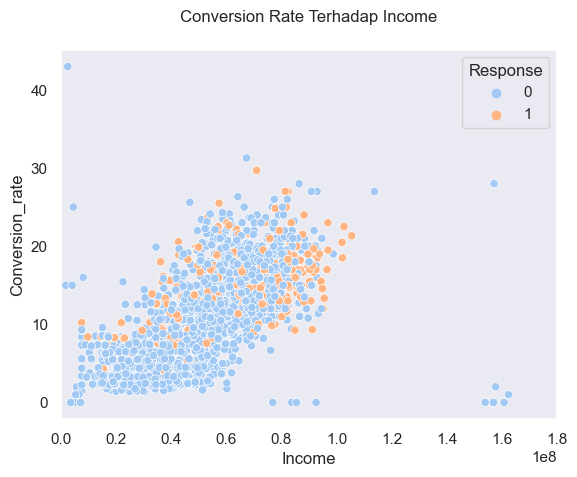

In [84]:
sns.set_theme(style='dark', palette='pastel')
sns.scatterplot(data=df, x='Income',y='Conversion_rate', hue='Response')
plt.title('Conversion Rate Terhadap Income', pad=20)
plt.xlim(0,180000000)

**2. Conversion Rate Terhadap Umur Customer**
- Data yang ditunjukkan pada scatter plot, menunjukkan bahwa mayoritas customer memiliki distribusi umur pada range 25 - 80 Tahun. Namun Umur tidak memiliki korelasi dengan tingkat conversion rate, yang artinya umur pelanggan tidak berpengaruh significant terhadap kemampuan daya beli.
- Jika melihat pada barplot, customer dengan kategori umur manula dan lansia memiliki rata rata conversion rate yang cukup tinggi namun tidak terlalu significant jika dibandingkan kategori umur pra lansia dan produktif. Penyebabnya mungkin dari beberapa faktor, diasumsikan kaum produktif & pra lansia cenderung lebih efisien dalam mengelola pengeluarannya, dan fokus bekerja dan memperbanyak Income untuk jaminan hari Tua.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Manula(>65)'),
  Text(1, 0, 'Lansia(56-65)'),
  Text(2, 0, 'Produktif(<45)'),
  Text(3, 0, 'Pra Lansia(46-55)')])

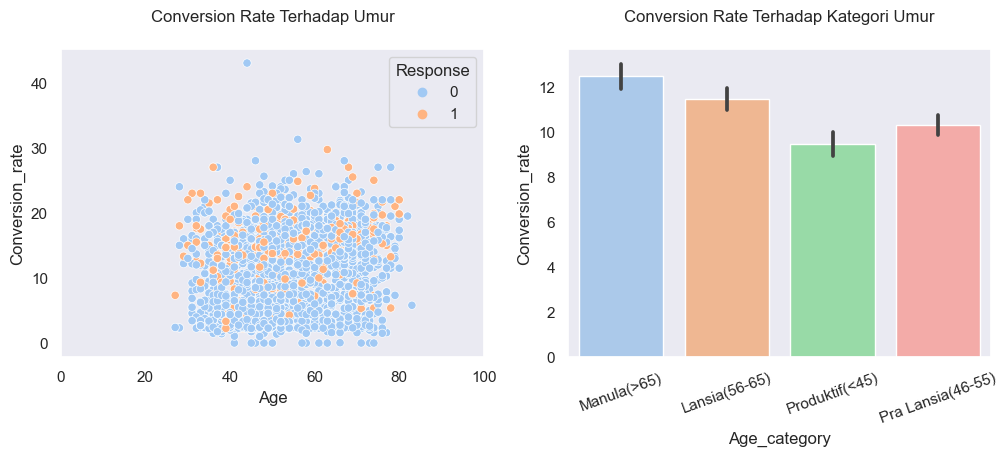

In [85]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Age',y='Conversion_rate', hue='Response')
plt.title('Conversion Rate Terhadap Umur', pad=20)
plt.xlim(0,100)

plt.subplot(1,2,2)
sns.barplot(data=df, x='Age_category', y='Conversion_rate', estimator=np.mean)
plt.title('Conversion Rate Terhadap Kategori Umur', pad=20)
plt.xticks(rotation=20)

**3. Tingkat Education Terhadap Total Campaign**

- Terlihat customer yang tingkat pendidikannya SMA memiliki rata rata accept campaign yang paling rendah, sedangkan customer dengan education S3 memiliki rata rata accept campaign terbesar. Faktor penyebabnya mungkin karena customer yang tingkat pendidikannya hanya mencapai SMA mempunyai kesulitan finansial dalam pekerjaannya, jika dibandingkan dengan customer dengan education S3 yang memiliki pekerjaan yang lebih baik sehingga income lebih besar. 

Text(0, 0.5, 'Avg Acc Campaign')

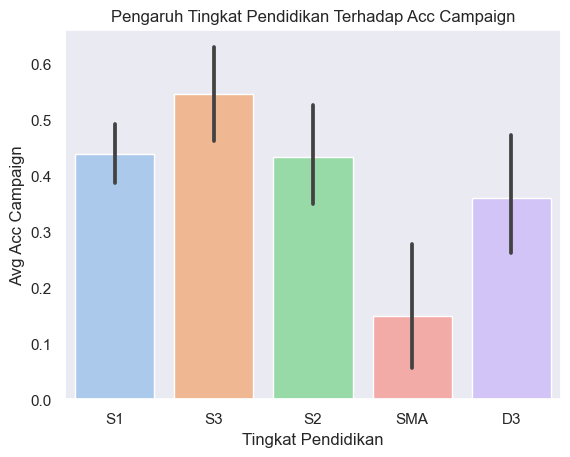

In [113]:
plt.title('Pengaruh Tingkat Pendidikan Terhadap Acc Campaign')
sns.barplot(data=df, x='Education', y='Total_acc_campaign')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Avg Acc Campaign')